## Import libraries

In [1]:
import numpy as np
import gym
from gym import spaces
import random
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
import tensorflow as tf
sns.set_theme()

from stable_baselines import A2C,PPO1,PPO2,HER,TRPO
from stable_baselines.common.cmd_util import make_vec_env
from stable_baselines.common.env_checker import check_env
from stable_baselines.common.policies import MlpPolicy,CnnPolicy
from stable_baselines.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines.common.evaluation import evaluate_policy
from stable_baselines.common.callbacks import EvalCallback

C:\Users\user\anaconda3\envs\stable_env\lib\site-packages\ale_py\roms\utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


## Import EduRecRL environment 

### First steps with the gym interface

As you have noticed in the previous notebooks, an environment that follows the gym interface is quite simple to use.
It provides to this user mainly three methods:
- `reset()` called at the beginning of an episode, it returns an observation
- `step(action)` called to take an action with the environment, it returns the next observation, the immediate reward, whether the episode is over and additional information
- (Optional) `render(method='human')` which allow to visualize the agent in action. 

Under the hood, it also contains two useful properties:
- `observation_space` which one of the gym spaces (`Discrete`, `Box`, ...) and describe the type and shape of the observation
- `action_space` which is also a gym space object that describes the action space, so the type of action that can be taken

The best way to learn about gym spaces is to look at the [source code](https://github.com/openai/gym/tree/master/gym/spaces), but you need to know at least the main ones:
- `gym.spaces.Box`: A (possibly unbounded) box in $R^n$. Specifically, a Box represents the Cartesian product of n closed intervals. Each interval has the form of one of [a, b], (-oo, b], [a, oo), or (-oo, oo).

In [3]:
from EduRecRL.envs.EduRecRL1 import EduRecEnv
from EduRecRL.functions.Functions import evaluate,testing

## Validate the environment

Stable Baselines provides a [helper](https://stable-baselines.readthedocs.io/en/master/common/env_checker.html) to check that your environment follows the Gym interface. It also optionally checks that the environment is compatible with Stable-Baselines (and emits warning if necessary).

In [20]:
env_edu = EduRecEnv()
# If the environment don't follow the interface, an error will be thrown
check_env(env_edu, warn=True)

## Testing the environment

In [21]:
testing(env=env_edu,n_steps=500)

[0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1]
Step 1
obs= [-0.166  0.441 -1.    -0.395 -0.706 -0.815 -0.627 -0.309 -0.206  0.078
 -0.162  0.37  -0.591  0.756 -0.945  0.341 -0.165 -0.218 -0.719 -0.604
  0.121  0.356 -0.373 -0.031  0.227  0.789 -0.83  -0.922 -0.66   0.229] reward= 0.5333333333333333 done= False info {'activity_duration': 116.50377132993, 'update prob': 0.4782306946804254, 'well dev comp': 20, 'time budget': 3483.49622867007, 'early_stop': False}
[1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0]
Step 2
obs= [-0.083  0.441 -1.    -0.335 -0.706 -0.815 -0.627 -0.309 -0.127 -0.138
 -0.162  0.096 -0.55   0.405 -0.94   0.073 -0.082 -0.218 -0.719 -0.604
  0.121  0.356 -0.373 -0.031 -0.018  0.789 -0.813 -0.922 -0.626  0.229] reward= 0.6666666666666666 done= False info {'activity_duration': 75.0273193080028, 'update prob': 0.4158642242594378, 'well dev comp': 22, 'time budget': 3408.4689093620673, 'early_stop': False}
[1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 

In [22]:
env = make_vec_env(lambda: env_edu, n_envs=1)
env_eval = make_vec_env(lambda: env_edu, n_envs=1)

# A2C

### Tuning learning rate hyperparameter





Instructions for updating:
Use keras.layers.flatten instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Learning rate 0.05

Step 1
Action:  [[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
  0. 0. 1. 1. 0. 1.]]
obs= [[-0.16595599  0.00845429 -0.99977125 -0.39533485 -0.70648822 -0.81532281
  -0.62747958 -0.30887855 -0.20646505  0.07763347 -0.16161097 -0.0406927
  -0.5910955   0.22936441 -0.94522481 -0.06134549 -0.1653904   0.11737966
  -0.71922612 -0.60379702  0.1210424   0.93652315 -0.37315164 -0.03074834
   0.7527783   0.78921333 -0.82991158 -0.92189043 -0.66033916  0.2293995 ]] reward= [0.6] done= [False] info= [{'activity_duration': 88.20891642133142, 'update prob': 0.5502729669572716, 'well dev comp': 21, 'time budget': 3511.791083578669, 'early_stop': False}]
Step 2
Action:  [[0. 1

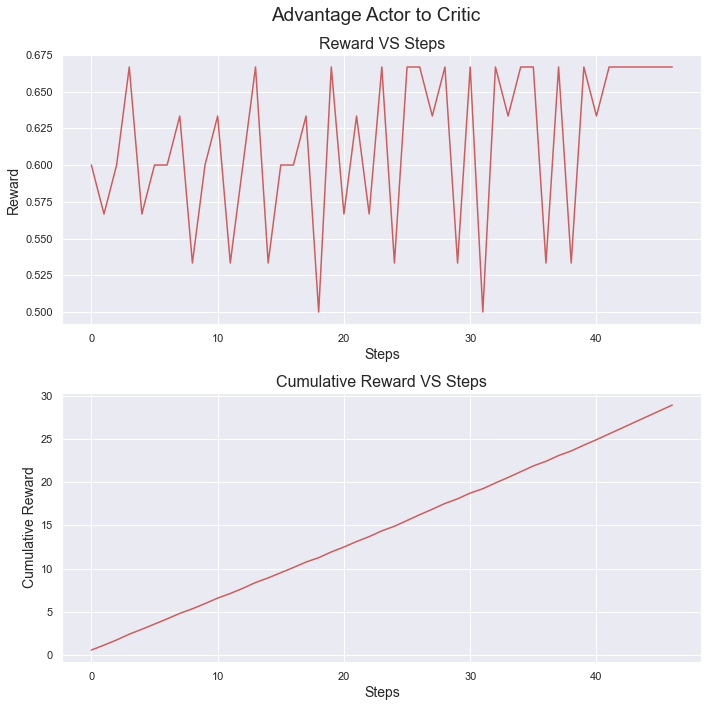


29.913324 1.7925267
Learning rate 0.1

Step 1
Action:  [[0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
  0. 1. 0. 0. 1. 0.]]
obs= [[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.81532281
  -0.62747958 -0.30887855 -0.20646505  0.07763347 -0.16161097  0.370439
  -0.5910955   0.22936441 -0.94522481  0.34093502 -0.1653904  -0.21783424
  -0.71922612 -0.60379702  0.60148914  0.35556621 -0.37315164 -0.03074834
   0.7527783   0.25244933 -0.82991158 -0.92189043 -0.66033916  0.75628501]] reward= [0.5] done= [False] info= [{'activity_duration': 67.6511315833512, 'update prob': 0.46128404964819897, 'well dev comp': 20, 'time budget': 3532.3488684166487, 'early_stop': False}]
Step 2
Action:  [[0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
  0. 1. 0. 0. 1. 0.]]
obs= [[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.79685509
  -0.62747958 -0.2397664  -0.12711156  0.07763347 -0.16161097  0.370439
  -0.5910955  -0.0165

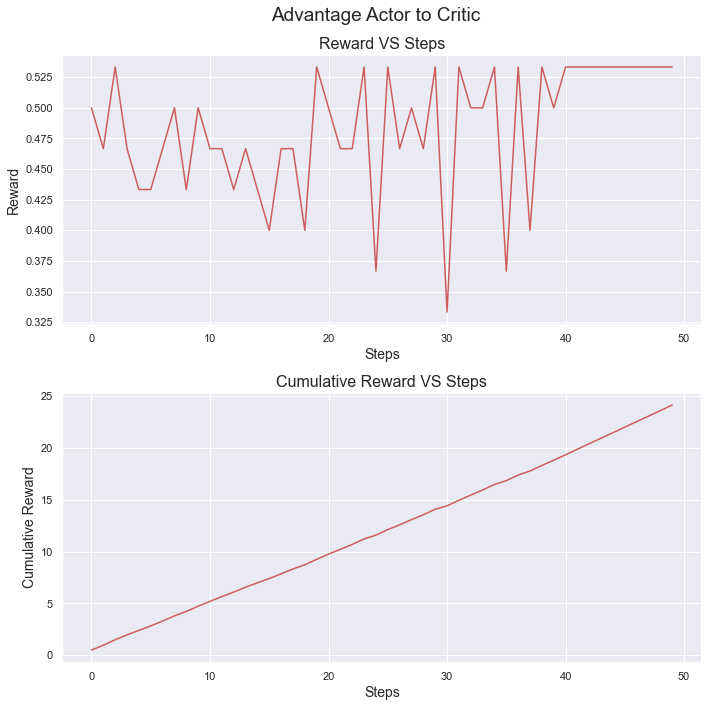


23.611994 1.35957
Learning rate 0.3

Step 1
Action:  [[0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
  0. 1. 0. 1. 1. 0.]]
obs= [[-0.16595599  0.15251919 -0.99974838 -0.33486834 -0.70648822 -0.81532281
  -0.59022753 -0.2397664  -0.12711156  0.07763347 -0.07777207  0.0963512
  -0.55020505  0.4049879  -0.93974729  0.07274802 -0.08192943 -0.10609627
  -0.69114874 -0.56417672  0.28119131  0.93652315 -0.37315164  0.10771619
   0.7527783   0.43137066 -0.82991158 -0.91407948 -0.62637308  0.75628501]] reward= [0.53333336] done= [False] info= [{'activity_duration': 90.08395923406144, 'update prob': 0.4165352746181294, 'well dev comp': 19, 'time budget': 3509.9160407659388, 'early_stop': False}]
Step 2
Action:  [[0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
  0. 1. 0. 1. 1. 0.]]
obs= [[-0.16595599 -0.07798465 -0.99972321 -0.26835517 -0.70648822 -0.81532281
  -0.54925029 -0.16374304 -0.03982271  0.07763347  0.01445072 -0.12291904
  -0.50522556


29.395004 1.4811666
Learning rate 0.5

Step 1
Action:  [[1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
  1. 0. 1. 1. 1. 0.]]
obs= [[-0.08255159  0.15251919 -0.99974838 -0.33486834 -0.70648822 -0.79685509
  -0.59022753 -0.30887855 -0.12711156  0.07763347 -0.07777207  0.0963512
  -0.55020505  0.4049879  -0.94522481  0.34093502 -0.1653904  -0.10609627
  -0.71922612 -0.56417672  0.28119131  0.93652315 -0.37315164  0.10771619
   0.40222264  0.78921333 -0.81290273 -0.91407948 -0.62637308  0.75628501]] reward= [0.53333336] done= [False] info= [{'activity_duration': 99.55268204657183, 'update prob': 0.4064379208017011, 'well dev comp': 19, 'time budget': 3500.447317953428, 'early_stop': False}]
Step 2
Action:  [[1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
  1. 0. 1. 1. 1. 0.]]
obs= [[ 0.00919325 -0.07798465 -0.99972321 -0.26835517 -0.70648822 -0.7765406
  -0.54925029 -0.30887855 -0.03982271  0.07763347  0.01445072 -0.12291904
  -0.50522556

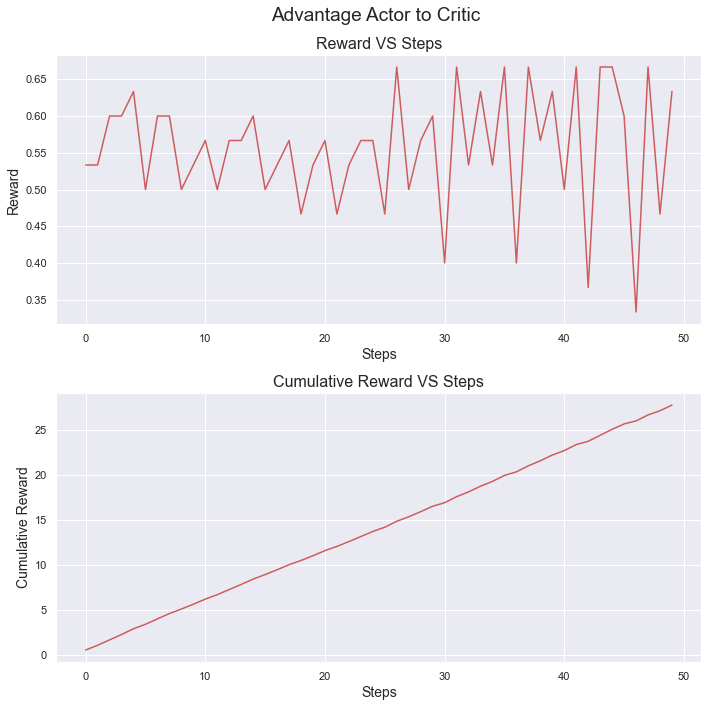


27.09466 1.5051742


In [6]:
for lr in [0.05,0.1,0.3,0.5]:
    log_dir = "./tensorboard_results2/" 
    model_A2C = A2C('MlpPolicy',env, verbose=0, tensorboard_log=log_dir,learning_rate=lr)
    model_A2C.learn(total_timesteps=int(30e3),tb_log_name='A2C_' + str(lr))
    print('Learning rate',lr)
    print()
    evaluate(model= model_A2C, n_steps=900,envs=env,name='Advantage Actor to Critic')
    print()
    mean_rew,std_rew= evaluate_policy(model = model_A2C,env= env,n_eval_episodes = 100)
    print(mean_rew,std_rew)

### Tuning entropy coeff (exploration)

Entropy coeff 0.05

Step 1
Action:  [[0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
  0. 1. 1. 0. 1. 0.]]
obs= [[-0.16595599  0.00845429 -0.99977125 -0.39533485 -0.70648822 -0.81532281
  -0.62747958 -0.30887855 -0.20646505 -0.24565657 -0.16161097 -0.0406927
  -0.5910955   0.22936441 -0.94522481 -0.06134549 -0.1653904  -0.21783424
  -0.71922612 -0.60379702  0.1210424   0.35556621 -0.37315164  0.38464523
   0.7527783   0.25244933 -0.82991158 -0.92189043 -0.66033916  0.75628501]] reward= [0.6333333] done= [False] info= [{'activity_duration': 32.13087890623413, 'update prob': 0.4843458027584114, 'well dev comp': 22, 'time budget': 3567.869121093766, 'early_stop': False}]
Step 2
Action:  [[0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
  0. 1. 1. 0. 1. 0.]]
obs= [[-0.16595599 -0.19323657 -0.99977125 -0.33486834 -0.67713704 -0.79685509
  -0.59022753 -0.30887855 -0.12711156 -0.17022223 -0.07777207  0.05523803
  -0.55020505 -0.01650847 -0.9452

obs= [[-1.65955991e-01 -9.97345858e-02 -9.99771250e-01 -1.77197375e-02
  -6.34074927e-02 -1.58139065e-01 -1.35485007e-01 -3.08878546e-01
  -2.59458422e-02 -7.40529406e-02 -9.47972247e-03 -1.43608994e-01
  -5.10478114e-02  5.63205348e-02 -9.45224814e-01 -1.62046111e-01
  -1.65390395e-01 -3.99013781e-02 -7.19226123e-01 -6.03797022e-01
   7.74855383e-04 -1.19899266e-01 -3.73151644e-01  3.84645231e-01
   7.52778305e-01  7.61560471e-02  6.61162242e-02 -9.21890434e-01
   4.32090762e-02  7.56285007e-01]] reward= [0.6333333] done= [False] info= [{'activity_duration': 48.7551813988557, 'update prob': 0.44878887227480835, 'well dev comp': 22, 'time budget': 1226.222448931863, 'early_stop': False}]
Step 33
Action:  [[0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
  0. 1. 1. 0. 1. 0.]]
obs= [[-0.16595599 -0.09973459 -0.99977125 -0.01771974 -0.06340749 -0.15813907
  -0.13548501 -0.30887855 -0.02594584 -0.07405294 -0.00947972 -0.14360899
  -0.05104781 -0.26057563 -0.94522481

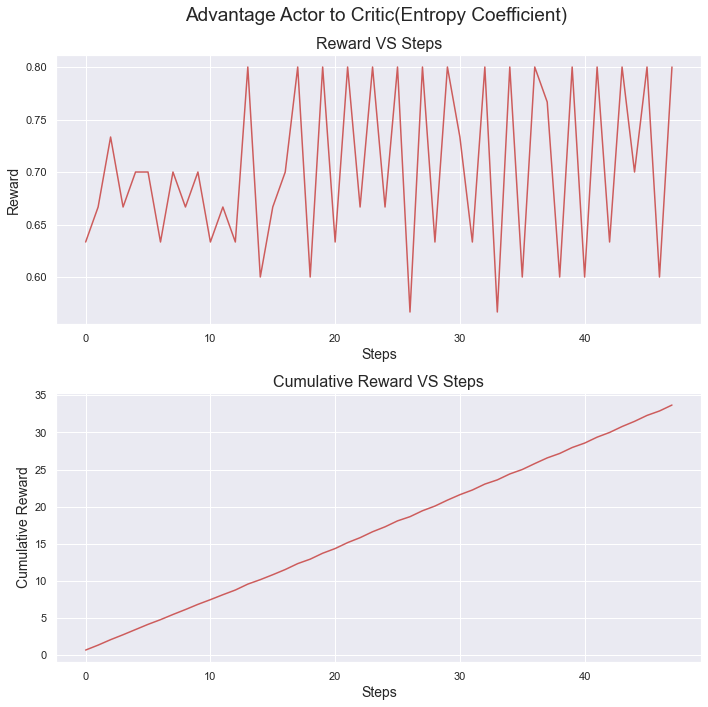


---------------------------------------------------------------------------
34.045326 1.617031
Entropy coeff 0.1

Step 1
Action:  [[1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
  0. 1. 0. 1. 1. 1.]]
obs= [[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.81532281
  -0.62747958 -0.30887855 -0.20646505  0.07763347 -0.16161097 -0.0406927
  -0.5910955   0.75623487 -0.94522481  0.34093502 -0.1653904   0.11737966
  -0.71922612 -0.60379702  0.1210424   0.93652315 -0.37315164 -0.03074834
   0.7527783   0.25244933 -0.82991158 -0.92189043 -0.66033916  0.2293995 ]] reward= [0.5] done= [False] info= [{'activity_duration': 76.21548665909529, 'update prob': 0.45446809312636005, 'well dev comp': 20, 'time budget': 3523.7845133409046, 'early_stop': False}]
Step 2
Action:  [[1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
  0. 1. 0. 1. 1. 1.]]
obs= [[-0.08255159  0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.81532281
  -0.59022753 -0


---------------------------------------------------------------------------
23.795998 1.1836026
Entropy coeff 0.2

Step 1
Action:  [[1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.
  1. 1. 0. 0. 1. 0.]]
obs= [[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.81532281
  -0.62747958 -0.30887855 -0.20646505 -0.24565657 -0.16161097  0.370439
  -0.5910955   0.75623487 -0.94522481  0.34093502 -0.1653904   0.11737966
  -0.71922612 -0.60379702  0.1210424   0.35556621 -0.37315164 -0.03074834
   0.22694481  0.25244933 -0.82991158 -0.92189043 -0.66033916  0.75628501]] reward= [0.53333336] done= [False] info= [{'activity_duration': 117.98424572750724, 'update prob': 0.5232924872852572, 'well dev comp': 20, 'time budget': 3482.015754272493, 'early_stop': False}]
Step 2
Action:  [[1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.
  1. 1. 0. 0. 1. 0.]]
obs= [[-0.08255159  0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.81532281
  -0.59022

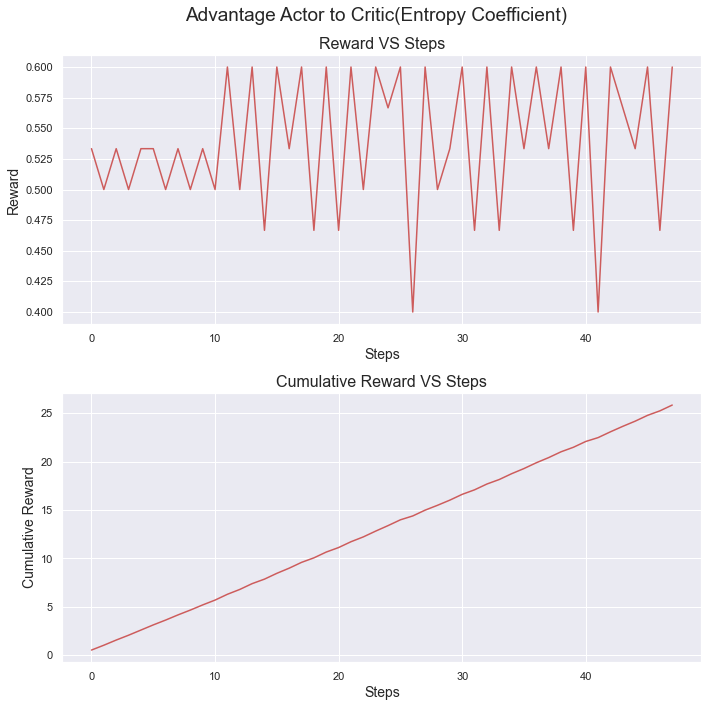


---------------------------------------------------------------------------
26.173672 1.2305945
Entropy coeff 0.3

Step 1
Action:  [[0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
  0. 1. 0. 1. 0. 1.]]
obs= [[-0.16595599  0.00845429 -0.99977125 -0.39533485 -0.70648822 -0.81532281
  -0.62747958 -0.30887855 -0.20646505 -0.24565657 -0.16161097 -0.0406927
  -0.5910955   0.22936441 -0.94522481 -0.06134549 -0.1653904   0.11737966
  -0.71922612 -0.60379702  0.60148914  0.93652315 -0.37315164 -0.03074834
   0.7527783   0.25244933 -0.82991158 -0.92189043 -0.66033916  0.2293995 ]] reward= [0.6333333] done= [False] info= [{'activity_duration': 39.26689764130049, 'update prob': 0.46258186484386615, 'well dev comp': 22, 'time budget': 3560.7331023586994, 'early_stop': False}]
Step 2
Action:  [[0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
  0. 1. 0. 1. 0. 1.]]
obs= [[-0.16595599 -0.19323657 -0.99974838 -0.39533485 -0.67713704 -0.81532281
  -0.5902


---------------------------------------------------------------------------
30.14767 1.6274341


In [7]:
for entr in [0.05,0.1,0.2,0.3]:
    log_dir = "./tensorboard_results2/" 
    model_A2C = A2C('MlpPolicy',env, verbose=0, tensorboard_log=log_dir,learning_rate=0.05,ent_coef=entr)
    model_A2C.learn(total_timesteps=int(30e3),tb_log_name='A2C_entr_' + str(entr))
    print('Entropy coeff',entr)
    print()
    evaluate(model= model_A2C, n_steps=900,envs=env,name='Advantage Actor to Critic(Entropy Coefficient)')
    print()
    print('---------------------------------------------------------------------------')
    mean_rew,std_rew= evaluate_policy(model = model_A2C,env= env,n_eval_episodes = 100)
    print(mean_rew,std_rew)

# TRPO

### Tuning KL-Divergence hyperparameter

KL Div 0.1

Step 1
Action:  [[1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
  0. 0. 1. 0. 1. 0.]]
obs= [[-0.083  0.153 -1.    -0.395 -0.706 -0.797 -0.627 -0.24  -0.127 -0.138
  -0.078  0.096 -0.55   0.756 -0.94   0.073 -0.165  0.117 -0.719 -0.564
   0.601  0.937 -0.31   0.108  0.753  0.789 -0.813 -0.922 -0.626  0.756]] reward= [0.433] done= [False] info= [{'activity_duration': 70.79679044729082, 'update prob': 0.35155227557433133, 'well dev comp': 19, 'time budget': 3529.2032095527093, 'early_stop': False}]
Step 2
Action:  [[1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
  0. 0. 1. 0. 1. 0.]]
obs= [[ 0.009 -0.078 -1.    -0.395 -0.706 -0.777 -0.627 -0.164 -0.04  -0.052
   0.014 -0.123 -0.505  0.756 -0.934 -0.142 -0.165  0.117 -0.719 -0.564
   0.601  0.937 -0.242 -0.114  0.753  0.789 -0.794 -0.922 -0.589  0.756]] reward= [0.467] done= [False] info= [{'activity_duration': 85.9371517724, 'update prob': 0.335248166196227, 'well dev comp': 2

22.641663 1.0887035
---------------------------------------------------------------------------
KL Div 0.3

Step 1
Action:  [[0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
  0. 0. 0. 1. 1. 0.]]
obs= [[-0.166  0.153 -1.    -0.395 -0.706 -0.815 -0.59  -0.24  -0.206 -0.138
  -0.162  0.096 -0.55   0.405 -0.94   0.341 -0.082  0.117 -0.719 -0.604
   0.281  0.937 -0.31   0.108  0.753  0.789 -0.83  -0.914 -0.626  0.756]] reward= [0.5] done= [False] info= [{'activity_duration': 62.244624730092404, 'update prob': 0.429915736660861, 'well dev comp': 19, 'time budget': 3537.7553752699077, 'early_stop': False}]
Step 2
Action:  [[0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
  0. 0. 1. 1. 1. 0.]]
obs= [[-0.166 -0.078 -1.    -0.335 -0.706 -0.815 -0.549 -0.164 -0.127 -0.052
  -0.162 -0.123 -0.505  0.124 -0.934  0.341  0.01   0.117 -0.719 -0.604
   0.025  0.937 -0.242 -0.114  0.753  0.789 -0.813 -0.905 -0.589  0.756]] reward= [0.533] done= [False] inf

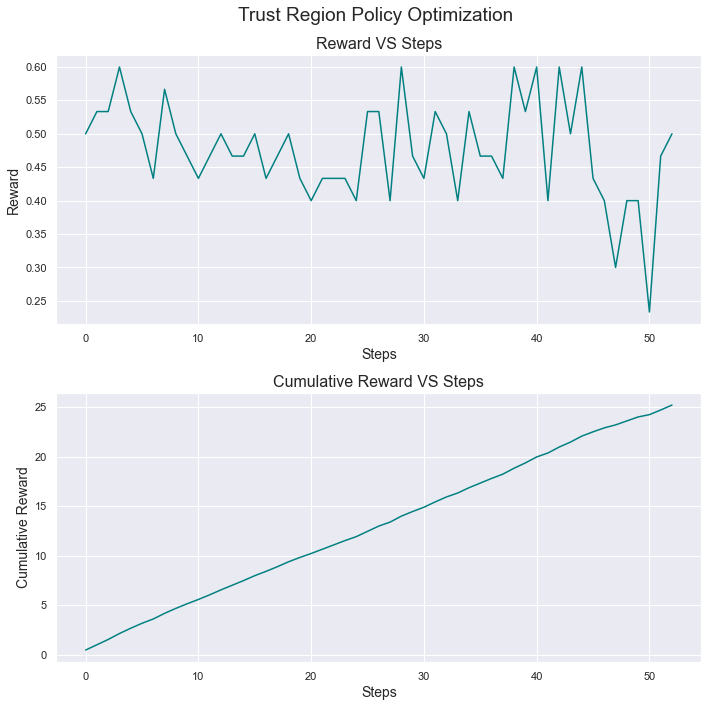

23.492332 0.8726437
---------------------------------------------------------------------------
KL Div 0.4

Step 1
Action:  [[0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
  1. 0. 0. 0. 0. 0.]]
obs= [[-0.166  0.008 -1.    -0.395 -0.706 -0.815 -0.627 -0.309 -0.206 -0.246
  -0.162  0.37  -0.591  0.756 -0.945 -0.061 -0.165  0.117 -0.719 -0.604
   0.601  0.356 -0.373 -0.031  0.227  0.789 -0.83  -0.922 -0.66   0.756]] reward= [0.533] done= [False] info= [{'activity_duration': 110.50918419869052, 'update prob': 0.5094165723504479, 'well dev comp': 21, 'time budget': 3489.4908158013095, 'early_stop': False}]
Step 2
Action:  [[1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0.]]
obs= [[-0.083  0.008 -1.    -0.395 -0.677 -0.815 -0.59  -0.24  -0.206 -0.17
  -0.078  0.37  -0.591  0.756 -0.94   0.033 -0.082  0.117 -0.691 -0.564
   0.601  0.084 -0.373 -0.031  0.227  0.789 -0.83  -0.922 -0.66   0.756]] reward= [0.433] done= [False] i

21.700327 0.9734523
---------------------------------------------------------------------------
KL Div 0.6

Step 1
Action:  [[1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1.
  0. 0. 0. 0. 1. 0.]]
obs= [[-0.083  0.441 -1.    -0.335 -0.706 -0.797 -0.627 -0.24  -0.127 -0.138
  -0.078  0.096 -0.55   0.405 -0.945  0.073 -0.165  0.117 -0.691 -0.564
   0.281  0.937 -0.31   0.108  0.753  0.789 -0.83  -0.922 -0.626  0.756]] reward= [0.467] done= [False] info= [{'activity_duration': 66.11225086985155, 'update prob': 0.42735879577823416, 'well dev comp': 19, 'time budget': 3533.887749130148, 'early_stop': False}]
Step 2
Action:  [[1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
  0. 0. 0. 0. 1. 0.]]
obs= [[ 0.009  0.441 -1.    -0.268 -0.706 -0.777 -0.627 -0.164 -0.04  -0.138
   0.014 -0.123 -0.505  0.124 -0.94  -0.142 -0.082  0.117 -0.66  -0.521
   0.025  0.937 -0.242 -0.114  0.753  0.789 -0.83  -0.922 -0.589  0.756]] reward= [0.5] done= [False] inf

30.797668 1.7984762
---------------------------------------------------------------------------


In [10]:
for kl in [0.1,0.3,0.4,0.6]:
    log_dir = "./tensorboard_results2/" 
    model_TRPO = TRPO('MlpPolicy',env, verbose=0, tensorboard_log=log_dir,max_kl=kl)
    model_TRPO.learn(total_timesteps=int(30e3),tb_log_name='TRPO_' + str(kl))
    print('KL Div',kl)
    print()
    evaluate(model= model_TRPO, n_steps=900,envs=env,name='Trust Region Policy Optimization',colors='teal')

    mean_rew,std_rew= evaluate_policy(model = model_TRPO,env= env,n_eval_episodes = 100)
    print(mean_rew,std_rew)
    print('---------------------------------------------------------------------------')

### Tuning entropy coeff (exploration)

Entropy coeff 0.05

Step 1
Action:  [[1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
  1. 0. 0. 1. 0. 1.]]
obs= [[-0.083  0.441 -1.    -0.335 -0.677 -0.797 -0.627 -0.309 -0.127  0.078
  -0.078  0.096 -0.591  0.756 -0.94   0.341 -0.165  0.117 -0.691 -0.564
   0.281  0.937 -0.373  0.385  0.402  0.789 -0.83  -0.914 -0.66   0.405]] reward= [0.467] done= [False] info= [{'activity_duration': 82.51186471848459, 'update prob': 0.3613301303520203, 'well dev comp': 18, 'time budget': 3517.4881352815155, 'early_stop': False}]
Step 2
Action:  [[1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.
  1. 0. 0. 1. 0. 1.]]
obs= [[ 0.009  0.441 -1.    -0.268 -0.645 -0.777 -0.627 -0.309 -0.04   0.078
   0.014 -0.123 -0.591  0.756 -0.934  0.341 -0.165  0.117 -0.66  -0.521
   0.025  0.937 -0.31   0.385  0.122  0.789 -0.83  -0.905 -0.66   0.124]] reward= [0.367] done= [False] info= [{'activity_duration': 64.11227544018183, 'update prob': 0.33145141322051574, 'well

  -0.064  0.937 -0.04   0.385 -0.181  0.789 -0.83  -0.084 -0.453 -0.179]] reward= [0.6] done= [False] info= [{'activity_duration': 45.208718821625155, 'update prob': 0.45770219432176756, 'well dev comp': 24, 'time budget': 435.2972759107278, 'early_stop': False}]
Step 50
Action:  [[1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
  1. 0. 0. 1. 1. 1.]]
obs= [[-0.22   0.441 -0.997 -0.222  0.06  -0.083 -0.627 -0.021 -0.229 -0.052
  -0.216 -0.068 -0.55   0.756 -0.065  0.341 -0.165  0.073 -0.061 -0.09
   0.029  0.937  0.056  0.385 -0.099  0.789 -0.83   0.008 -0.398 -0.097]] reward= [0.433] done= [False] info= [{'activity_duration': 69.47615035456278, 'update prob': 0.41307690010127407, 'well dev comp': 19, 'time budget': 365.82112555616504, 'early_stop': False}]
Step 51
Action:  [[1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
  1. 0. 0. 1. 1. 1.]]
obs= [[-0.22   0.441 -0.997 -0.222 -0.258 -0.083 -0.627 -0.021 -0.229 -0.052
  -0.216 -0.068 -0.

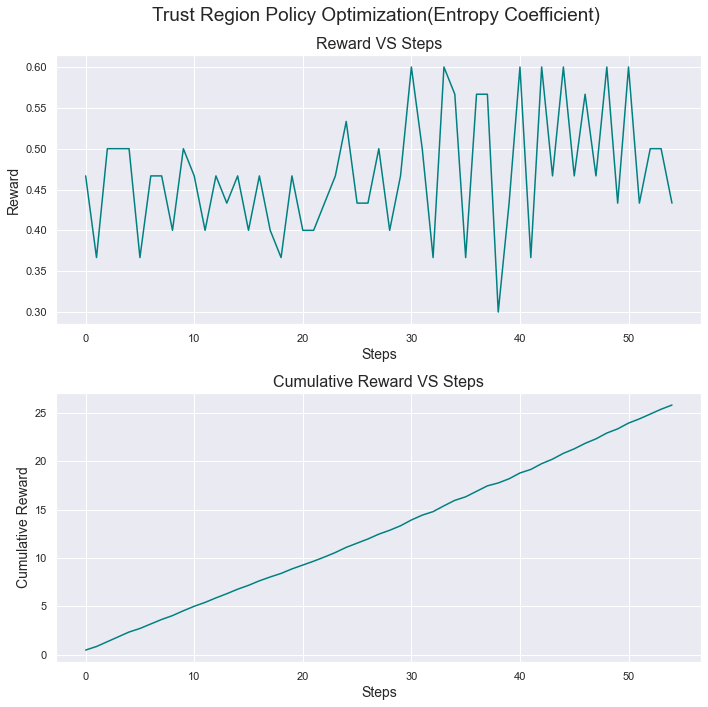

22.689333 1.2931694
---------------------------------------------------------------------------
Entropy coeff 0.1

Step 1
Action:  [[0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.
  0. 1. 1. 0. 0. 0.]]
obs= [[-0.166  0.441 -1.    -0.335 -0.677 -0.797 -0.59  -0.309 -0.206  0.078
  -0.162  0.096 -0.55   0.756 -0.945  0.341 -0.082 -0.106 -0.719 -0.604
   0.601  0.937 -0.31   0.385  0.753  0.431 -0.813 -0.922 -0.66   0.756]] reward= [0.433] done= [False] info= [{'activity_duration': 91.729832806828, 'update prob': 0.35331170032449505, 'well dev comp': 19, 'time budget': 3508.270167193172, 'early_stop': False}]
Step 2
Action:  [[0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
  0. 1. 1. 0. 0. 0.]]
obs= [[-0.166  0.441 -1.    -0.268 -0.645 -0.777 -0.549 -0.309 -0.206  0.078
  -0.162  0.096 -0.505  0.756 -0.945  0.073  0.01  -0.017 -0.719 -0.604
   0.601  0.937 -0.242  0.385  0.753  0.145 -0.794 -0.922 -0.66   0.756]] reward= [0.367] done= [Fal

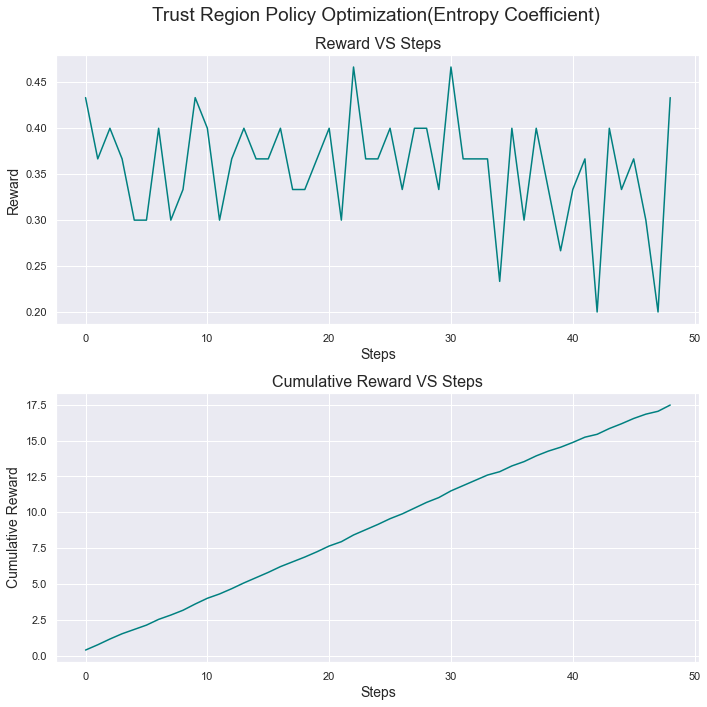

17.276665 0.7717153
---------------------------------------------------------------------------
Entropy coeff 0.2

Step 1
Action:  [[0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
  1. 1. 1. 1. 0. 1.]]
obs= [[-0.166  0.008 -1.    -0.395 -0.706 -0.815 -0.627 -0.309 -0.206 -0.246
  -0.162  0.37  -0.591  0.229 -0.945  0.341 -0.165  0.117 -0.719 -0.604
   0.121  0.937 -0.373  0.385  0.227  0.252 -0.83  -0.922 -0.66   0.229]] reward= [0.5] done= [False] info= [{'activity_duration': 50.5848499221731, 'update prob': 0.47375856680403455, 'well dev comp': 19, 'time budget': 3549.415150077827, 'early_stop': False}]
Step 2
Action:  [[0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
  1. 1. 1. 1. 0. 1.]]
obs= [[-0.166 -0.193 -1.    -0.335 -0.706 -0.797 -0.627 -0.309 -0.127 -0.17
  -0.078  0.37  -0.55  -0.017 -0.945  0.341 -0.165  0.117 -0.691 -0.604
  -0.103  0.937 -0.31   0.385 -0.018  0.002 -0.813 -0.914 -0.66  -0.016]] reward= [0.633] done= [False

25.590002 1.331737
---------------------------------------------------------------------------
Entropy coeff 0.3

Step 1
Action:  [[0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.
  1. 1. 1. 1. 1. 0.]]
obs= [[-0.166  0.153 -1.    -0.395 -0.706 -0.797 -0.627 -0.24  -0.206  0.078
  -0.078  0.37  -0.591  0.405 -0.945  0.341 -0.082 -0.106 -0.691 -0.604
   0.601  0.549 -0.373  0.385  0.402  0.431 -0.813 -0.914 -0.626  0.756]] reward= [0.567] done= [False] info= [{'activity_duration': 92.27647045479671, 'update prob': 0.4403479010640143, 'well dev comp': 19, 'time budget': 3507.7235295452033, 'early_stop': False}]
Step 2
Action:  [[0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.
  1. 1. 1. 1. 0. 0.]]
obs= [[-0.166 -0.078 -1.    -0.395 -0.706 -0.777 -0.59  -0.164 -0.206  0.078
   0.014  0.37  -0.591  0.124 -0.945  0.341 -0.082 -0.106 -0.66  -0.564
   0.601  0.239 -0.373  0.108  0.122  0.145 -0.794 -0.905 -0.626  0.756]] reward= [0.5] done= [Fals

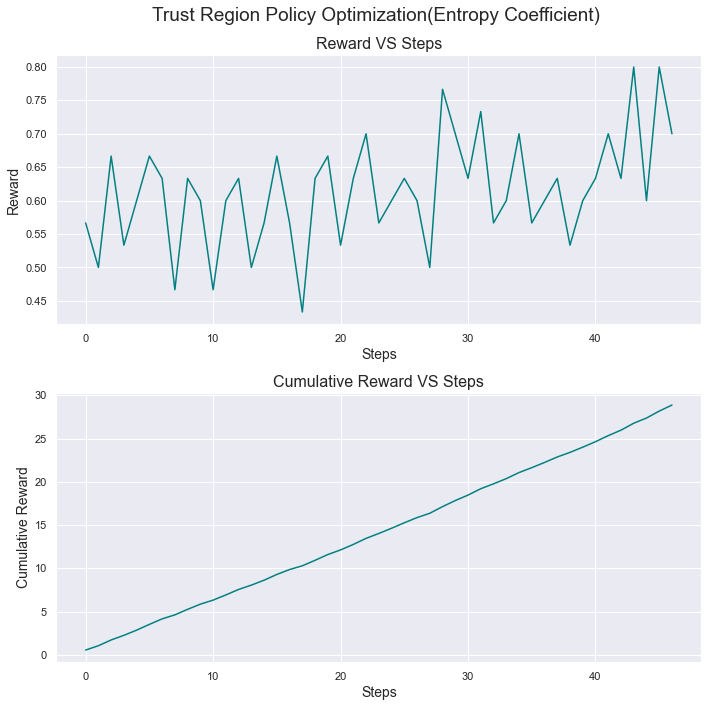

30.11334 1.8678503
---------------------------------------------------------------------------


In [6]:
for entr in [0.05,0.1,0.2,0.3]:
    log_dir = "./tensorboard_results2/" 
    model_TRPO = TRPO('MlpPolicy',env, verbose=0, tensorboard_log=log_dir,max_kl=0.6,entcoeff=entr)
    model_TRPO.learn(total_timesteps=int(30e3),tb_log_name='TRPO_entr_' + str(entr))
    print('Entropy coeff',entr)
    print()
    evaluate(model= model_TRPO, n_steps=900,envs=env,name='Trust Region Policy Optimization(Entropy Coefficient)'
             ,colors='teal')
    
    mean_rew,std_rew= evaluate_policy(model = model_TRPO,env= env,n_eval_episodes = 100)
    print(mean_rew,std_rew)
    print('---------------------------------------------------------------------------')

# PPO

### Tuning clip epsilon hyperparameter

Clip param 0.2

Step 1
Action:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
  1. 0. 1. 0. 0. 1.]]
obs= [[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.81532281
  -0.62747958 -0.30887855 -0.20646505 -0.24565657 -0.16161097  0.370439
  -0.5910955   0.22936441 -0.94522481 -0.06134549 -0.1653904  -0.21783424
  -0.71922612 -0.60379702  0.60148914  0.93652315 -0.37315164 -0.03074834
   0.22694481  0.78921333 -0.82991158 -0.92189043 -0.66033916  0.2293995 ]] reward= [0.56666666] done= [False] info= [{'activity_duration': 34.20707864303367, 'update prob': 0.47356103638466895, 'well dev comp': 22, 'time budget': 3565.7929213569664, 'early_stop': False}]
Step 2
Action:  [[0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
  1. 0. 1. 0. 0. 1.]]
obs= [[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.79685509
  -0.62747958 -0.2397664  -0.20646505 -0.17022223 -0.07777207  0.370439
  -0.55020505 -0.01650847 -0.93974729

25.416006 1.2813925
---------------------------------------------------------------------------
Clip param 0.4

Step 1
Action:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 1.]]
obs= [[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.81532281
  -0.62747958 -0.30887855 -0.20646505 -0.24565657 -0.16161097 -0.0406927
  -0.5910955   0.22936441 -0.94522481 -0.06134549 -0.1653904  -0.21783424
  -0.71922612 -0.60379702  0.1210424   0.93652315 -0.37315164  0.38464523
   0.22694481  0.78921333 -0.82991158 -0.92189043 -0.66033916  0.2293995 ]] reward= [0.6] done= [False] info= [{'activity_duration': 91.64280147942225, 'update prob': 0.6720914040885905, 'well dev comp': 22, 'time budget': 3508.3571985205776, 'early_stop': False}]
Step 2
Action:  [[1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 1.]]
obs= [[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.81532281
  -0.62747958 -0.308

30.927671 1.6471597
---------------------------------------------------------------------------
Clip param 0.6

Step 1
Action:  [[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 1. 0. 0. 0. 1.]]
obs= [[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.81532281
  -0.62747958 -0.30887855 -0.20646505  0.07763347 -0.16161097 -0.0406927
  -0.5910955   0.75623487 -0.94522481 -0.06134549 -0.1653904   0.11737966
  -0.71922612 -0.60379702  0.60148914  0.93652315 -0.37315164 -0.03074834
   0.7527783   0.25244933 -0.82991158 -0.92189043 -0.66033916  0.2293995 ]] reward= [0.53333336] done= [False] info= [{'activity_duration': 115.18434132531837, 'update prob': 0.6383788704075177, 'well dev comp': 21, 'time budget': 3484.815658674682, 'early_stop': False}]
Step 2
Action:  [[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 1. 0. 0. 0. 1.]]
obs= [[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.81532281
  -0.62747958

28.811348 1.4663961
---------------------------------------------------------------------------
Clip param 0.8

Step 1
Action:  [[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
  1. 0. 0. 0. 0. 0.]]
obs= [[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.81532281
  -0.62747958 -0.30887855 -0.20646505  0.07763347 -0.16161097  0.370439
  -0.5910955   0.75623487 -0.94522481  0.34093502 -0.1653904   0.11737966
  -0.71922612 -0.60379702  0.1210424   0.93652315 -0.37315164 -0.03074834
   0.22694481  0.78921333 -0.82991158 -0.92189043 -0.66033916  0.75628501]] reward= [0.4] done= [False] info= [{'activity_duration': 45.69653980513327, 'update prob': 0.5032352320336697, 'well dev comp': 19, 'time budget': 3554.3034601948666, 'early_stop': False}]
Step 2
Action:  [[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
  1. 0. 0. 0. 0. 0.]]
obs= [[-0.08255159  0.44064899 -0.99977125 -0.33486834 -0.70648822 -0.81532281
  -0.62747958 -0.3088

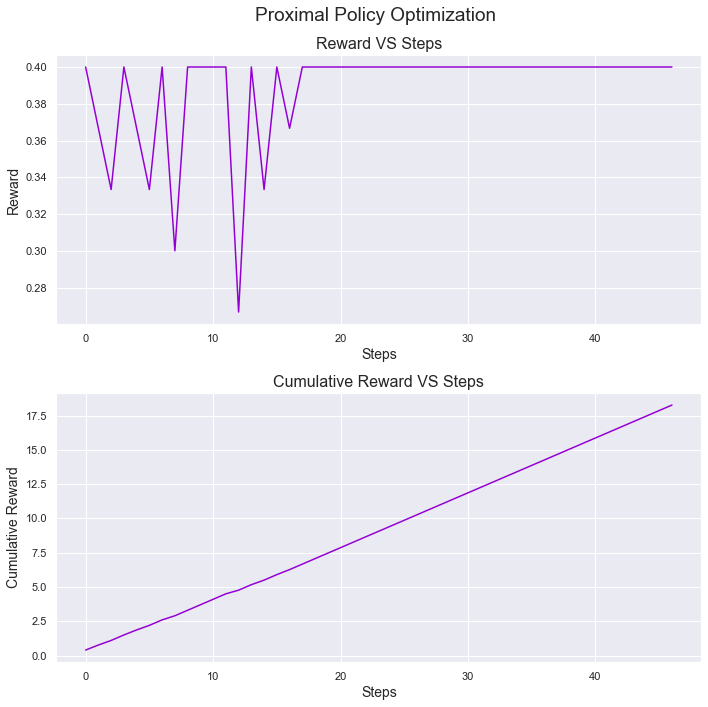

18.718657 0.95775473
---------------------------------------------------------------------------


In [14]:
for clip in [0.2,0.4,0.6,0.8]:
    log_dir = "./tensorboard_results2/" 
    model_PPO = PPO1('MlpPolicy',env, verbose=0, tensorboard_log=log_dir,clip_param=clip)
    model_PPO.learn(total_timesteps=int(30e3),tb_log_name='PPO_' + str(clip))
    print('Clip param',clip)
    print()
    evaluate(model = model_PPO, n_steps=900,envs=env,name='Proximal Policy Optimization',colors='darkviolet')
    
    mean_rew,std_rew= evaluate_policy(model = model_PPO,env= env,n_eval_episodes = 100)
    print(mean_rew,std_rew)
    print('---------------------------------------------------------------------------')

### Tuning entropy coeff (exploration)

Entropy coeff 0.05

Step 1
Action:  [[1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
  1. 0. 1. 1. 0. 0.]]
obs= [[-0.08255159  0.44064899 -0.99977125 -0.33486834 -0.67713704 -0.79685509
  -0.59022753 -0.30887855 -0.12711156 -0.13789323 -0.07777207  0.370439
  -0.5910955   0.75623487 -0.93974729  0.07274802 -0.1653904  -0.10609627
  -0.71922612 -0.56417672  0.28119131  0.93652315 -0.31046681  0.38464523
   0.40222264  0.78921333 -0.81290273 -0.91407948 -0.66033916  0.75628501]] reward= [0.5] done= [False] info= [{'activity_duration': 97.68721144796623, 'update prob': 0.35698772421033853, 'well dev comp': 20, 'time budget': 3502.312788552034, 'early_stop': False}]
Step 2
Action:  [[1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
  1. 0. 1. 1. 0. 0.]]
obs= [[ 0.00919325  0.44064899 -0.99977125 -0.26835517 -0.64485074 -0.7765406
  -0.54925029 -0.30887855 -0.03982271 -0.05168255  0.01445072  0.370439
  -0.5910955   0.75623487 -0.93372202 -0.1

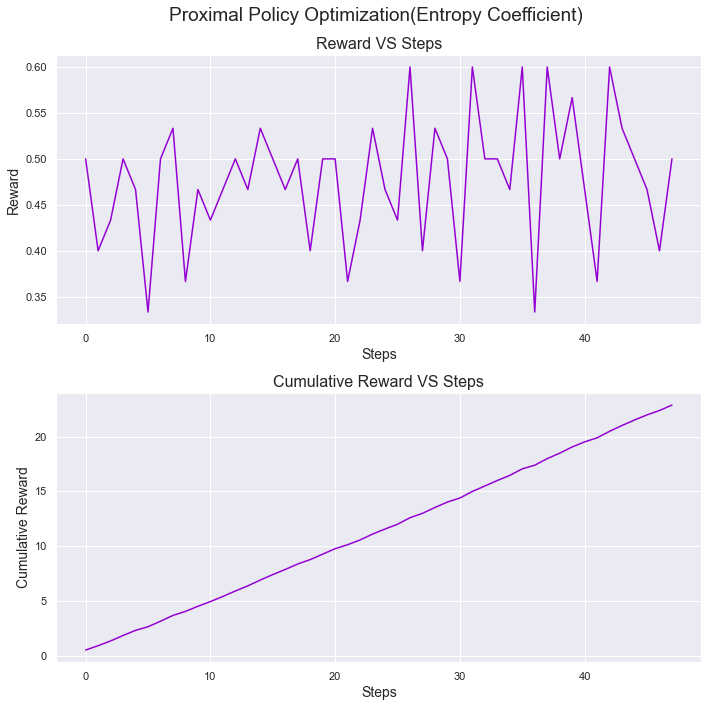

23.204004 1.1768254
---------------------------------------------------------------------------
Entropy coeff 0.1

Step 1
Action:  [[0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
obs= [[-0.16595599  0.44064899 -0.99974838 -0.39533485 -0.70648822 -0.79685509
  -0.59022753 -0.30887855 -0.20646505 -0.13789323 -0.07777207  0.370439
  -0.5910955   0.4049879  -0.94522481  0.34093502 -0.08192943  0.11737966
  -0.71922612 -0.60379702  0.60148914  0.93652315 -0.37315164  0.38464523
   0.7527783   0.78921333 -0.82991158 -0.92189043 -0.66033916  0.75628501]] reward= [0.43333334] done= [False] info= [{'activity_duration': 105.11134138982602, 'update prob': 0.36173523830407683, 'well dev comp': 19, 'time budget': 3494.888658610174, 'early_stop': False}]
Step 2
Action:  [[0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0.]]
obs= [[-0.16595599  0.44064899 -0.99972321 -0.39533485 -0.70648822 -0.7765406
  -0.549250

9.832333 0.39036894
---------------------------------------------------------------------------
Entropy coeff 0.2

Step 1
Action:  [[0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.
  0. 0. 1. 0. 1. 0.]]
obs= [[-0.16595599  0.15251919 -0.99974838 -0.33486834 -0.70648822 -0.81532281
  -0.62747958 -0.2397664  -0.20646505 -0.13789323 -0.16161097  0.370439
  -0.5910955   0.4049879  -0.93974729  0.07274802 -0.08192943  0.11737966
  -0.71922612 -0.60379702  0.28119131  0.93652315 -0.31046681  0.38464523
   0.7527783   0.78921333 -0.81290273 -0.92189043 -0.62637308  0.75628501]] reward= [0.5] done= [False] info= [{'activity_duration': 50.910006115705926, 'update prob': 0.4053438170647134, 'well dev comp': 19, 'time budget': 3549.089993884294, 'early_stop': False}]
Step 2
Action:  [[0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.
  0. 0. 1. 0. 1. 0.]]
obs= [[-0.16595599 -0.07798465 -0.99972321 -0.26835517 -0.70648822 -0.81532281
  -0.62747958 -0.1

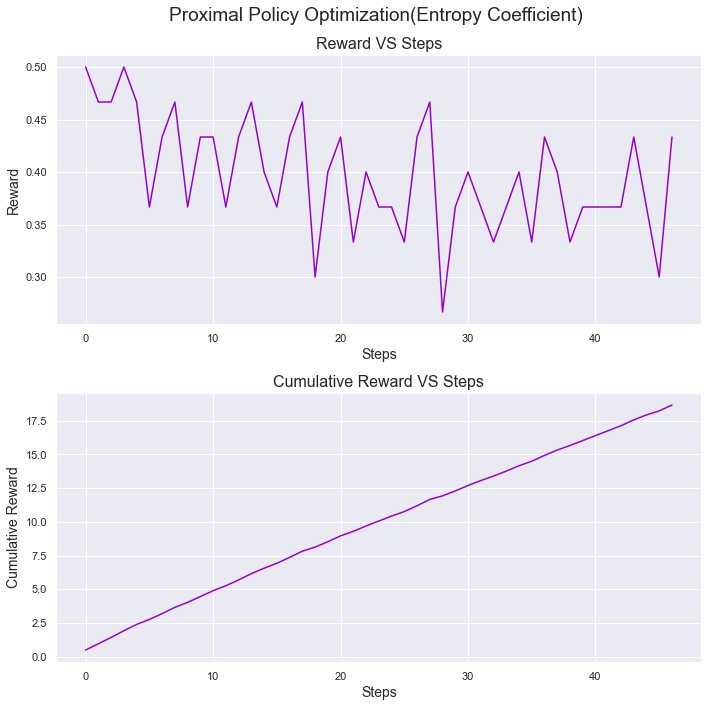

19.230328 0.93087775
---------------------------------------------------------------------------
Entropy coeff 0.3

Step 1
Action:  [[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
  0. 0. 0. 0. 0. 0.]]
obs= [[-0.08255159  0.15251919 -0.99974838 -0.33486834 -0.67713704 -0.79685509
  -0.59022753 -0.30887855 -0.12711156 -0.13789323 -0.16161097  0.370439
  -0.55020505  0.75623487 -0.93974729  0.07274802 -0.08192943  0.11737966
  -0.69114874 -0.56417672  0.60148914  0.54921852 -0.31046681  0.38464523
   0.7527783   0.78921333 -0.82991158 -0.92189043 -0.66033916  0.75628501]] reward= [0.46666667] done= [False] info= [{'activity_duration': 115.23297223226905, 'update prob': 0.3376775698720736, 'well dev comp': 19, 'time budget': 3484.7670277677307, 'early_stop': False}]
Step 2
Action:  [[0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
  1. 0. 0. 1. 0. 0.]]
obs= [[-0.08255159 -0.07798465 -0.99972321 -0.26835517 -0.64485074 -0.79685509
  -0.5902

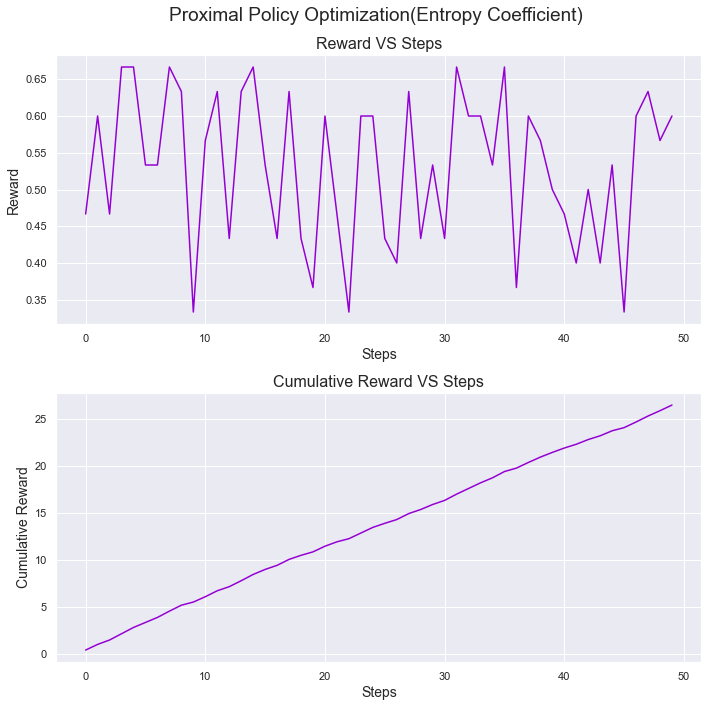

25.619997 1.0307713
---------------------------------------------------------------------------


In [15]:
for entr in [0.05,0.1,0.2,0.3]:
    log_dir = "./tensorboard_results2/" 
    model_PPO = PPO1('MlpPolicy',env, verbose=0, tensorboard_log=log_dir,clip_param=0.4,entcoeff=entr)
    model_PPO.learn(total_timesteps=int(30e3),tb_log_name='PPO_entr' + str(entr))
    print('Entropy coeff',entr)
    print()
    evaluate(model = model_PPO, n_steps=900,envs=env,name='Proximal Policy Optimization(Entropy Coefficient)'
             ,colors='darkviolet')
    
    mean_rew,std_rew= evaluate_policy(model = model_PPO,env= env,n_eval_episodes = 100)
    print(mean_rew,std_rew)
    print('---------------------------------------------------------------------------')

## Increasing training steps & evaluate the environment during the training process

## A2C

Eval num_timesteps=500, episode_reward=16.23 +/- 0.75
Episode length: 52.40 +/- 2.58
New best mean reward!
Eval num_timesteps=1000, episode_reward=17.74 +/- 1.10
Episode length: 48.40 +/- 3.01
New best mean reward!
Eval num_timesteps=1500, episode_reward=12.77 +/- 0.58
Episode length: 49.80 +/- 2.48
Eval num_timesteps=2000, episode_reward=20.35 +/- 0.78
Episode length: 47.00 +/- 1.79
New best mean reward!
Eval num_timesteps=2500, episode_reward=25.20 +/- 0.00
Episode length: 33.00 +/- 0.00
New best mean reward!
Eval num_timesteps=3000, episode_reward=29.57 +/- 0.93
Episode length: 48.20 +/- 1.47
New best mean reward!
Eval num_timesteps=3500, episode_reward=23.77 +/- 0.20
Episode length: 47.20 +/- 0.40
Eval num_timesteps=4000, episode_reward=26.50 +/- 0.59
Episode length: 48.20 +/- 0.98
Eval num_timesteps=4500, episode_reward=32.73 +/- 1.51
Episode length: 50.00 +/- 2.28
New best mean reward!
Eval num_timesteps=5000, episode_reward=31.78 +/- 1.21
Episode length: 50.00 +/- 1.79
Eval num_

Eval num_timesteps=47000, episode_reward=24.86 +/- 0.95
Episode length: 47.40 +/- 1.74
Eval num_timesteps=47500, episode_reward=25.15 +/- 0.92
Episode length: 47.80 +/- 1.60
Eval num_timesteps=48000, episode_reward=25.86 +/- 1.91
Episode length: 49.20 +/- 3.49
Eval num_timesteps=48500, episode_reward=24.76 +/- 0.63
Episode length: 47.20 +/- 1.17
Eval num_timesteps=49000, episode_reward=26.00 +/- 0.72
Episode length: 49.40 +/- 1.36
Eval num_timesteps=49500, episode_reward=25.87 +/- 1.42
Episode length: 49.20 +/- 2.71
Eval num_timesteps=50000, episode_reward=25.63 +/- 0.73
Episode length: 48.80 +/- 1.33
Eval num_timesteps=50500, episode_reward=23.87 +/- 0.96
Episode length: 45.60 +/- 1.62
Eval num_timesteps=51000, episode_reward=24.53 +/- 1.53
Episode length: 46.80 +/- 2.79
Eval num_timesteps=51500, episode_reward=25.08 +/- 1.76
Episode length: 47.80 +/- 3.19
Eval num_timesteps=52000, episode_reward=26.54 +/- 1.70
Episode length: 50.40 +/- 3.14
Eval num_timesteps=52500, episode_reward=25

Eval num_timesteps=94500, episode_reward=30.20 +/- 1.01
Episode length: 52.00 +/- 1.79
Eval num_timesteps=95000, episode_reward=28.01 +/- 1.64
Episode length: 48.40 +/- 2.58
Eval num_timesteps=95500, episode_reward=27.99 +/- 0.88
Episode length: 48.40 +/- 1.36
Eval num_timesteps=96000, episode_reward=26.87 +/- 1.87
Episode length: 46.40 +/- 2.94
Eval num_timesteps=96500, episode_reward=27.50 +/- 0.16
Episode length: 47.60 +/- 0.49
Eval num_timesteps=97000, episode_reward=28.51 +/- 1.04
Episode length: 49.20 +/- 1.72
Eval num_timesteps=97500, episode_reward=27.99 +/- 1.95
Episode length: 48.40 +/- 3.20
Eval num_timesteps=98000, episode_reward=27.69 +/- 1.73
Episode length: 47.80 +/- 2.79
Eval num_timesteps=98500, episode_reward=27.72 +/- 0.88
Episode length: 47.80 +/- 1.47
Eval num_timesteps=99000, episode_reward=26.71 +/- 1.05
Episode length: 46.20 +/- 1.72
Eval num_timesteps=99500, episode_reward=29.01 +/- 1.18
Episode length: 50.00 +/- 1.79
Eval num_timesteps=100000, episode_reward=2

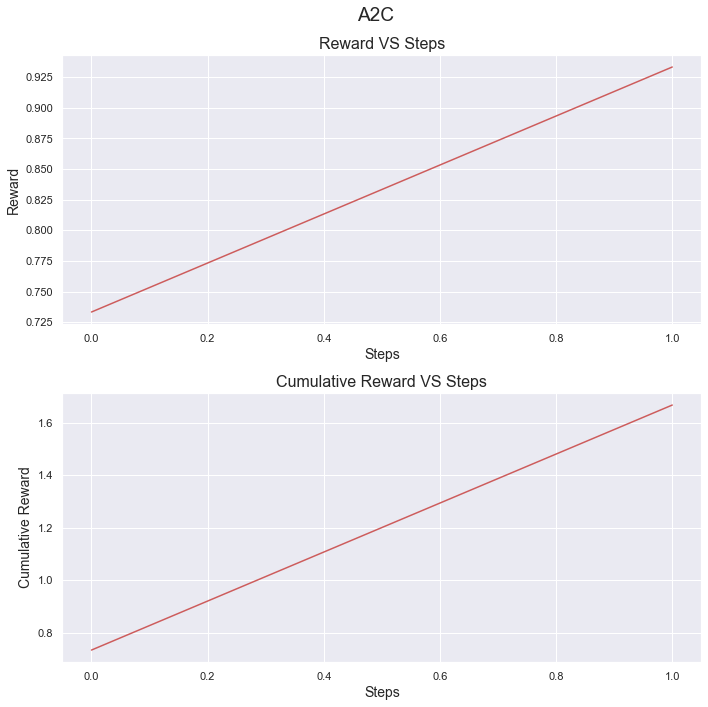

28.400673 1.5052507


In [26]:
log_dir = "./tensorboard_results_all/"
# Use deterministic actions for evaluation
eval_callback = EvalCallback(env_eval, eval_freq=500,
                             deterministic=True, render=False)

model_A2C = A2C('MlpPolicy', env,tensorboard_log=log_dir,learning_rate=0.05)
model_A2C.learn(int(100e3), callback=eval_callback)
evaluate(model= model, n_steps=900,envs=env)

mean_rew,std_rew= evaluate_policy(model = model_A2C,env= env,n_eval_episodes = 100)
print(mean_rew,std_rew)

## TRPO

Eval num_timesteps=0, episode_reward=28.75 +/- 2.10
Episode length: 48.20 +/- 3.19
New best mean reward!
Eval num_timesteps=0, episode_reward=28.84 +/- 1.34
Episode length: 48.40 +/- 1.96
New best mean reward!
Eval num_timesteps=1024, episode_reward=29.00 +/- 0.98
Episode length: 48.00 +/- 1.41
New best mean reward!
Eval num_timesteps=1024, episode_reward=29.40 +/- 1.41
Episode length: 48.60 +/- 2.06
New best mean reward!
Eval num_timesteps=2048, episode_reward=28.05 +/- 1.42
Episode length: 47.60 +/- 2.33
Eval num_timesteps=2048, episode_reward=29.25 +/- 1.68
Episode length: 49.40 +/- 2.65
Eval num_timesteps=3072, episode_reward=24.78 +/- 1.40
Episode length: 50.00 +/- 2.76
Eval num_timesteps=3072, episode_reward=23.77 +/- 0.58
Episode length: 48.00 +/- 1.10
Eval num_timesteps=4096, episode_reward=30.03 +/- 0.68
Episode length: 49.40 +/- 1.02
New best mean reward!
Eval num_timesteps=4096, episode_reward=29.23 +/- 0.98
Episode length: 48.20 +/- 1.47
Eval num_timesteps=5120, episode_rew

Eval num_timesteps=46080, episode_reward=27.51 +/- 0.88
Episode length: 45.60 +/- 1.20
Eval num_timesteps=47104, episode_reward=27.15 +/- 1.58
Episode length: 47.00 +/- 2.61
Eval num_timesteps=47104, episode_reward=27.49 +/- 1.11
Episode length: 47.60 +/- 1.85
Eval num_timesteps=48128, episode_reward=30.65 +/- 1.92
Episode length: 47.60 +/- 2.80
Eval num_timesteps=48128, episode_reward=31.05 +/- 1.62
Episode length: 48.20 +/- 2.40
Eval num_timesteps=49152, episode_reward=31.63 +/- 0.90
Episode length: 49.60 +/- 1.36
Eval num_timesteps=49152, episode_reward=31.20 +/- 1.48
Episode length: 49.00 +/- 2.19
Eval num_timesteps=50176, episode_reward=14.47 +/- 0.00
Episode length: 21.00 +/- 0.00
Eval num_timesteps=50176, episode_reward=14.47 +/- 0.00
Episode length: 21.00 +/- 0.00
Eval num_timesteps=51200, episode_reward=34.37 +/- 1.29
Episode length: 49.00 +/- 1.67
New best mean reward!
Eval num_timesteps=51200, episode_reward=33.12 +/- 1.70
Episode length: 47.40 +/- 2.15
Eval num_timesteps=52

Eval num_timesteps=93184, episode_reward=34.98 +/- 0.97
Episode length: 51.20 +/- 1.33
Eval num_timesteps=93184, episode_reward=33.51 +/- 1.26
Episode length: 49.20 +/- 1.72
Eval num_timesteps=94208, episode_reward=32.25 +/- 0.52
Episode length: 48.40 +/- 0.80
Eval num_timesteps=94208, episode_reward=32.13 +/- 1.54
Episode length: 48.20 +/- 2.23
Eval num_timesteps=95232, episode_reward=33.95 +/- 1.02
Episode length: 47.40 +/- 1.36
Eval num_timesteps=95232, episode_reward=33.95 +/- 1.02
Episode length: 47.40 +/- 1.36
Eval num_timesteps=96256, episode_reward=33.62 +/- 1.88
Episode length: 48.80 +/- 2.56
Eval num_timesteps=96256, episode_reward=33.03 +/- 2.32
Episode length: 48.00 +/- 3.16
Eval num_timesteps=97280, episode_reward=24.97 +/- 0.76
Episode length: 47.00 +/- 1.26
Eval num_timesteps=97280, episode_reward=25.45 +/- 1.16
Episode length: 47.80 +/- 1.94
Eval num_timesteps=98304, episode_reward=31.19 +/- 2.01
Episode length: 47.80 +/- 2.99
Eval num_timesteps=98304, episode_reward=32

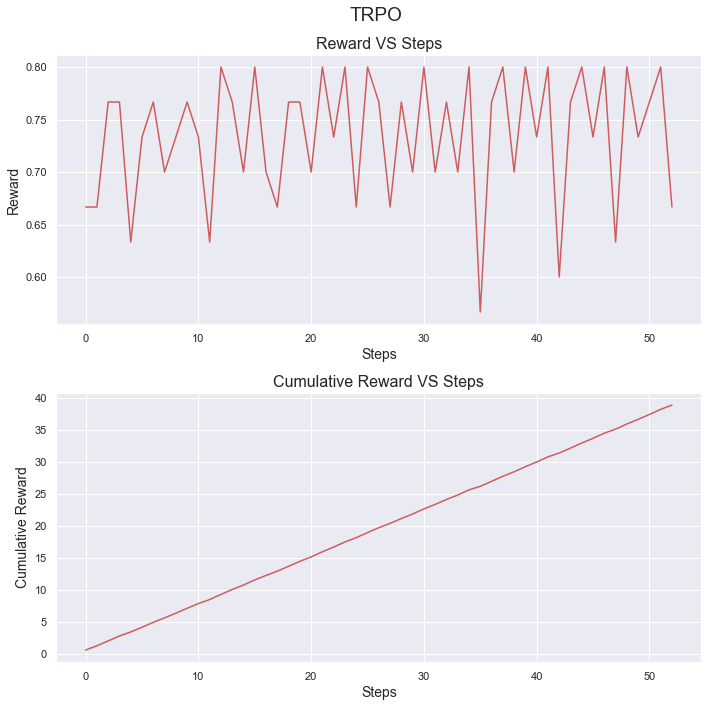

35.907333 1.6911508


In [24]:
log_dir = "./tensorboard_results_all/" 
eval_callback = EvalCallback(env_eval, eval_freq=500,
                             deterministic=True, render=False)
model_TRPO = TRPO('MlpPolicy',env, verbose=0, tensorboard_log=log_dir,max_kl=0.6)
model_TRPO.learn(total_timesteps=int(100e3),tb_log_name='TRPO', callback=eval_callback)
evaluate(model = model_TRPO, n_steps=900,envs=env,name='TRPO')

mean_rew,std_rew= evaluate_policy(model = model_TRPO,env= env,n_eval_episodes = 100)
print(mean_rew,std_rew)

## PPO

Eval num_timesteps=256, episode_reward=28.47 +/- 1.37
Episode length: 48.00 +/- 2.28
New best mean reward!
Eval num_timesteps=768, episode_reward=29.77 +/- 0.75
Episode length: 49.00 +/- 1.26
New best mean reward!
Eval num_timesteps=1280, episode_reward=19.27 +/- 0.00
Episode length: 29.00 +/- 0.00
Eval num_timesteps=1792, episode_reward=27.63 +/- 1.55
Episode length: 48.20 +/- 2.32
Eval num_timesteps=2304, episode_reward=27.19 +/- 0.85
Episode length: 48.40 +/- 1.36
Eval num_timesteps=2816, episode_reward=29.23 +/- 1.33
Episode length: 49.00 +/- 2.00
Eval num_timesteps=3328, episode_reward=28.13 +/- 1.65
Episode length: 48.00 +/- 2.76
Eval num_timesteps=3840, episode_reward=25.84 +/- 0.53
Episode length: 49.60 +/- 1.02
Eval num_timesteps=4352, episode_reward=19.43 +/- 0.80
Episode length: 48.80 +/- 1.94
Eval num_timesteps=4864, episode_reward=19.57 +/- 0.36
Episode length: 50.00 +/- 0.89
Eval num_timesteps=5376, episode_reward=19.27 +/- 1.07
Episode length: 48.80 +/- 2.56
Eval num_tim

Eval num_timesteps=47360, episode_reward=22.21 +/- 1.16
Episode length: 47.80 +/- 2.48
Eval num_timesteps=47872, episode_reward=22.21 +/- 0.95
Episode length: 47.80 +/- 2.04
Eval num_timesteps=48384, episode_reward=22.37 +/- 1.75
Episode length: 49.20 +/- 3.82
Eval num_timesteps=48896, episode_reward=22.15 +/- 0.34
Episode length: 48.80 +/- 0.75
Eval num_timesteps=49408, episode_reward=24.02 +/- 0.71
Episode length: 48.00 +/- 1.41
Eval num_timesteps=49920, episode_reward=25.26 +/- 1.06
Episode length: 49.40 +/- 2.06
Eval num_timesteps=50432, episode_reward=22.21 +/- 0.80
Episode length: 47.00 +/- 1.67
Eval num_timesteps=50944, episode_reward=29.33 +/- 1.23
Episode length: 50.80 +/- 2.14
Eval num_timesteps=51456, episode_reward=26.97 +/- 1.29
Episode length: 51.20 +/- 2.48
Eval num_timesteps=51968, episode_reward=25.81 +/- 0.91
Episode length: 48.60 +/- 1.74
Eval num_timesteps=52480, episode_reward=26.64 +/- 0.35
Episode length: 47.00 +/- 0.63
Eval num_timesteps=52992, episode_reward=26

Eval num_timesteps=94464, episode_reward=29.51 +/- 1.95
Episode length: 49.80 +/- 3.25
Eval num_timesteps=94976, episode_reward=27.71 +/- 1.91
Episode length: 46.80 +/- 3.19
Eval num_timesteps=95488, episode_reward=28.67 +/- 0.61
Episode length: 48.40 +/- 1.02
Eval num_timesteps=95744, episode_reward=28.07 +/- 1.24
Episode length: 47.40 +/- 2.06
Eval num_timesteps=96256, episode_reward=29.27 +/- 0.81
Episode length: 49.40 +/- 1.36
Eval num_timesteps=96768, episode_reward=28.67 +/- 0.72
Episode length: 48.40 +/- 1.20
Eval num_timesteps=97280, episode_reward=29.87 +/- 1.55
Episode length: 50.40 +/- 2.58
Eval num_timesteps=97792, episode_reward=28.91 +/- 1.71
Episode length: 48.80 +/- 2.86
Eval num_timesteps=98304, episode_reward=29.87 +/- 0.81
Episode length: 50.40 +/- 1.36
Eval num_timesteps=98816, episode_reward=28.79 +/- 0.61
Episode length: 48.60 +/- 1.02
Eval num_timesteps=99328, episode_reward=27.95 +/- 0.96
Episode length: 47.20 +/- 1.60
Eval num_timesteps=99840, episode_reward=28

  -0.115  0.937 -0.373  0.385 -0.032  0.789 -0.83  -0.922 -0.66  -0.03 ]] reward= [0.6] done= [False] info= [{'activity_duration': 93.63434184220057, 'update prob': 0.45194858109482594, 'well dev comp': 24, 'time budget': 2065.685594060457, 'early_stop': False}]
Step 21
Action:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 1.]]
obs= [[-0.166 -0.173 -1.    -0.395 -0.706 -0.815 -0.627 -0.309 -0.206 -0.15
  -0.055  0.37  -0.591  0.756 -0.945  0.341 -0.165 -0.118 -0.719 -0.604
  -0.115  0.937 -0.373  0.385 -0.032  0.789 -0.83  -0.922 -0.66  -0.03 ]] reward= [0.6] done= [False] info= [{'activity_duration': 40.33523292732664, 'update prob': 0.45194858109482594, 'well dev comp': 24, 'time budget': 2025.3503611331303, 'early_stop': False}]
Step 22
Action:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 1.]]
obs= [[-0.166 -0.173 -1.    -0.395 -0.706 -0.815 -0.627 -0.309 -0.206 -0.15
  -0.055  0.37  -0.591 

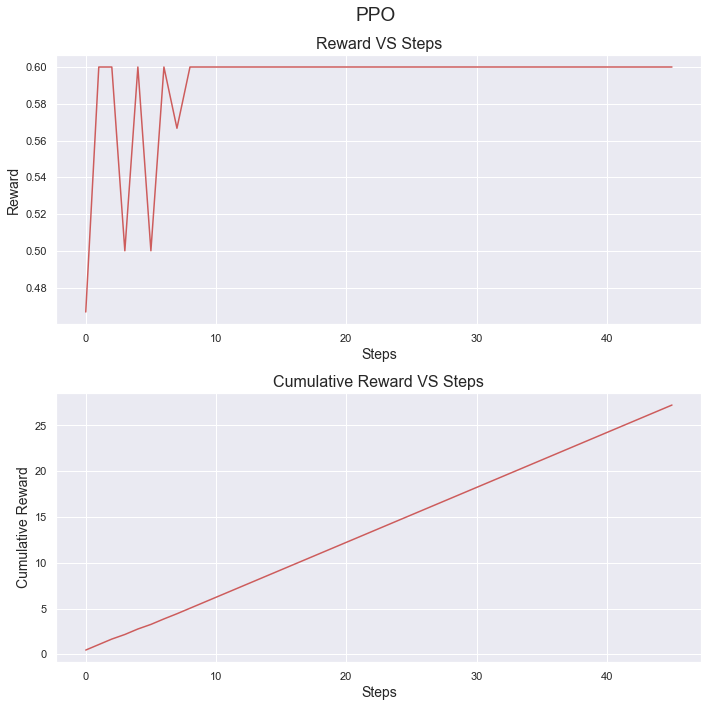

28.733345 1.4635582


In [25]:
log_dir = "./tensorboard_results_all/" 
eval_callback = EvalCallback(env_eval, eval_freq=500,
                             deterministic=True, render=False)
model_PPO = PPO1('MlpPolicy',env, verbose=0, tensorboard_log=log_dir,clip_param=0.4)
model_PPO.learn(total_timesteps=int(100e3),tb_log_name='PPO', callback=eval_callback)
evaluate(model = model_PPO, n_steps=900,envs=env,name='PPO')

mean_rew,std_rew= evaluate_policy(model = model_PPO,env= env,n_eval_episodes = 100)
print(mean_rew,std_rew)